In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense, SimpleRNN,GRU,Flatten, LSTM,GlobalMaxPool1D
from tensorflow.keras.models import  Model
from tensorflow.keras.optimizers import SGD, Adam

In [0]:
#building dataset
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
#   y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [7]:
# linear model classification -- will fail because decision boundry is non linear
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the network
r = model.fit(
  X, Y,
  epochs=100,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 2s 967us/sample - loss: 0.7829 - accuracy: 0.4844 - val_loss: 0.7000 - val_accuracy: 0.5116
Epoch 2/100
2500/2500 [==============================] - 0s 142us/sample - loss: 0.6955 - accuracy: 0.5104 - val_loss: 0.6955 - val_accuracy: 0.5080
Epoch 3/100
2500/2500 [==============================] - 0s 131us/sample - loss: 0.6939 - accuracy: 0.5208 - val_loss: 0.6974 - val_accuracy: 0.5080
Epoch 4/100
2500/2500 [==============================] - 0s 142us/sample - loss: 0.6930 - accuracy: 0.5424 - val_loss: 0.6958 - val_accuracy: 0.5060
Epoch 5/100
2500/2500 [==============================] - 0s 145us/sample - loss: 0.6929 - accuracy: 0.5308 - val_loss: 0.6967 - val_accuracy: 0.4960
Epoch 6/100
2500/2500 [==============================] - 0s 134us/sample - loss: 0.6939 - accuracy: 0.5092 - val_loss: 0.6960 - val_accuracy: 0.5084
Epoch 7/100
2500/2500 [==============================] - 0

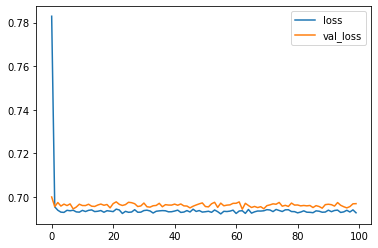

In [8]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

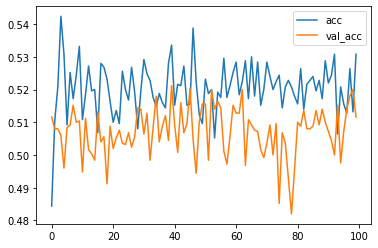

In [9]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

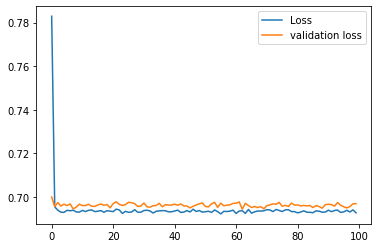

In [10]:
# plot loss
plt.plot(r.history["loss"], label="Loss")
plt.plot(r.history["val_loss"], label="validation loss")
plt.legend()

In [0]:
# we try a simple RNN
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  # optimizer='rmsprop',
#   optimizer='adam',
  optimizer=Adam(lr=0.01),
  # optimizer=SGD(lr=0.1, momentum=0.9),
  metrics=['accuracy'],
)

In [12]:
# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 2s 612us/sample - loss: 0.7070 - accuracy: 0.5272 - val_loss: 0.6956 - val_accuracy: 0.5152
Epoch 2/200
2500/2500 [==============================] - 1s 370us/sample - loss: 0.6941 - accuracy: 0.5096 - val_loss: 0.6957 - val_accuracy: 0.5092
Epoch 3/200
2500/2500 [==============================] - 1s 364us/sample - loss: 0.6925 - accuracy: 0.5176 - val_loss: 0.6924 - val_accuracy: 0.5096
Epoch 4/200
2500/2500 [==============================] - 1s 399us/sample - loss: 0.6908 - accuracy: 0.5240 - val_loss: 0.6883 - val_accuracy: 0.5360
Epoch 5/200
2500/2500 [==============================] - 1s 396us/sample - loss: 0.6851 - accuracy: 0.5596 - val_loss: 0.6708 - val_accuracy: 0.6048
Epoch 6/200
2500/2500 [==============================] - 1s 345us/sample - loss: 0.6407 - accuracy: 0.6680 - val_loss: 0.5876 - val_accuracy: 0.7904
Epoch 7/200
2500/2500 [==============================] - 1

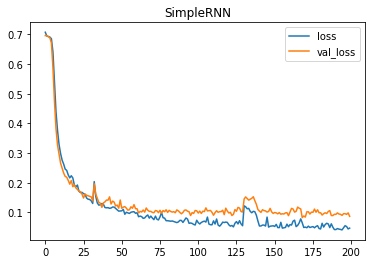

In [13]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("SimpleRNN")
plt.legend()
plt.show()

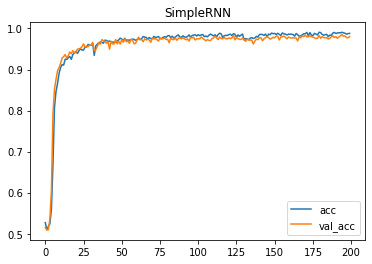

In [14]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.title("SimpleRNN")
plt.legend()
plt.show()

Now we change the problem to ling distance problem.

In [0]:
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

Again, we test with our SimpleRNN. This time it should perform not good.

In [16]:
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 2s 729us/sample - loss: 0.7099 - accuracy: 0.4960 - val_loss: 0.6959 - val_accuracy: 0.5068
Epoch 2/200
2500/2500 [==============================] - 1s 326us/sample - loss: 0.6964 - accuracy: 0.4944 - val_loss: 0.6937 - val_accuracy: 0.4992
Epoch 3/200
2500/2500 [==============================] - 1s 327us/sample - loss: 0.6954 - accuracy: 0.4936 - val_loss: 0.6945 - val_accuracy: 0.5032
Epoch 4/200
2500/2500 [==============================] - 1s 326us/sample - loss: 0.6941 - accuracy: 0.5016 - val_loss: 0.6934 - val_accuracy: 0.4956
Epoch 5/200
2500/2500 [==============================] - 1s 406us/sample - loss: 0.6945 - accuracy: 0.5012 - val_loss: 0.6944 - val_accuracy: 0.5068
Epoch 6/200
2500/2500 [==============================] - 1s 324us/sample - loss: 0.6915 - accuracy: 0.5280 - val_loss: 0.6899 - val_accuracy: 0.5344
Epoch 7/200
2500/2500 [==============================] - 1

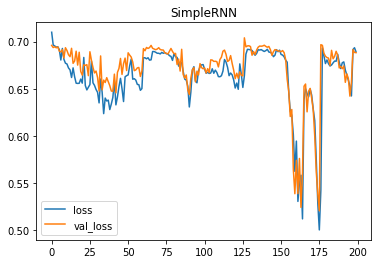

In [17]:

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("SimpleRNN - hard")
plt.legend()
plt.show()

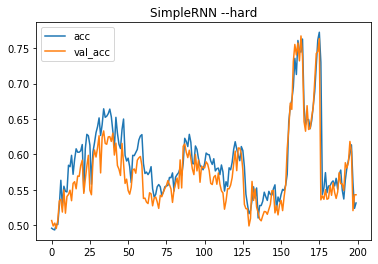

In [18]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.title("SimpleRNN --hard")
plt.legend()
plt.show()

Now we check how does LSTM performs.

In [19]:
# Now test our LSTM RNN
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 6s 3ms/sample - loss: 0.6946 - accuracy: 0.5116 - val_loss: 0.6941 - val_accuracy: 0.5132
Epoch 2/200
2500/2500 [==============================] - 1s 204us/sample - loss: 0.6940 - accuracy: 0.5168 - val_loss: 0.6940 - val_accuracy: 0.5096
Epoch 3/200
2500/2500 [==============================] - 0s 200us/sample - loss: 0.6937 - accuracy: 0.5064 - val_loss: 0.6939 - val_accuracy: 0.5084
Epoch 4/200
2500/2500 [==============================] - 1s 213us/sample - loss: 0.6925 - accuracy: 0.5192 - val_loss: 0.6932 - val_accuracy: 0.5044
Epoch 5/200
2500/2500 [==============================] - 0s 189us/sample - loss: 0.6919 - accuracy: 0.5148 - val_loss: 0.6916 - val_accuracy: 0.5220
Epoch 6/200
2500/2500 [==============================] - 1s 205us/sample - loss: 0.6923 - accuracy: 0.5152 - val_loss: 0.6899 - val_accuracy: 0.5292
Epoch 7/200
2500/2500 [==============================] - 0s 

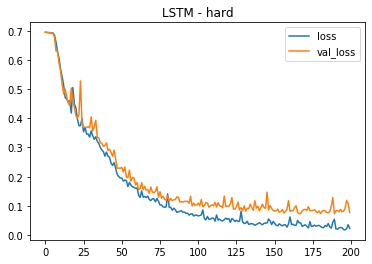

In [20]:

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("LSTM - hard")
plt.legend()
plt.show()

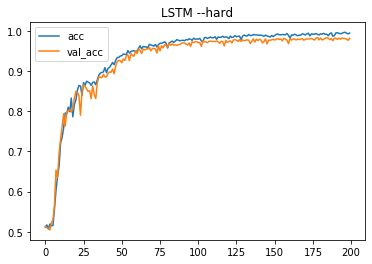

In [21]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.title("LSTM --hard")
plt.legend()
plt.show()

We now test with GRU another similar network to LSTM.

In [22]:
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = GRU(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/400
2500/2500 [==============================] - 2s 753us/sample - loss: 0.6943 - accuracy: 0.5076 - val_loss: 0.6934 - val_accuracy: 0.5064
Epoch 2/400
2500/2500 [==============================] - 0s 190us/sample - loss: 0.6942 - accuracy: 0.5060 - val_loss: 0.6945 - val_accuracy: 0.5020
Epoch 3/400
2500/2500 [==============================] - 1s 212us/sample - loss: 0.6933 - accuracy: 0.5144 - val_loss: 0.6939 - val_accuracy: 0.5072
Epoch 4/400
2500/2500 [==============================] - 0s 194us/sample - loss: 0.6943 - accuracy: 0.5008 - val_loss: 0.6935 - val_accuracy: 0.4968
Epoch 5/400
2500/2500 [==============================] - 1s 217us/sample - loss: 0.6928 - accuracy: 0.5140 - val_loss: 0.6952 - val_accuracy: 0.5008
Epoch 6/400
2500/2500 [==============================] - 1s 209us/sample - loss: 0.6931 - accuracy: 0.5204 - val_loss: 0.6936 - val_accuracy: 0.4920
Epoch 7/400
2500/2500 [==============================] - 1

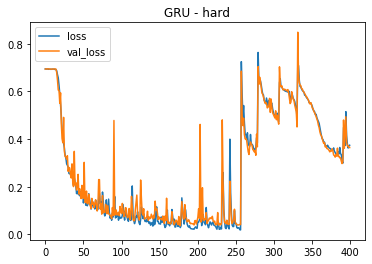

In [23]:

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("GRU - hard")
plt.legend()
plt.show()

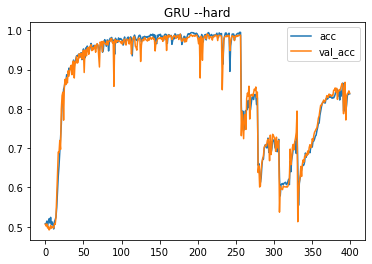

In [24]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.title("GRU --hard")
plt.legend()
plt.show()

We can increast T in hard to increase the sequence length to make the problem more difficult.

In [27]:
# LSTM with global max pooling
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=100,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 2s 702us/sample - loss: 0.6937 - accuracy: 0.5052 - val_loss: 0.6930 - val_accuracy: 0.5188
Epoch 2/100
2500/2500 [==============================] - 1s 200us/sample - loss: 0.6927 - accuracy: 0.5212 - val_loss: 0.6931 - val_accuracy: 0.5244
Epoch 3/100
2500/2500 [==============================] - 1s 224us/sample - loss: 0.6931 - accuracy: 0.5092 - val_loss: 0.6928 - val_accuracy: 0.4836
Epoch 4/100
2500/2500 [==============================] - 1s 207us/sample - loss: 0.6917 - accuracy: 0.5044 - val_loss: 0.6934 - val_accuracy: 0.5140
Epoch 5/100
2500/2500 [==============================] - 1s 203us/sample - loss: 0.6918 - accuracy: 0.5036 - val_loss: 0.6918 - val_accuracy: 0.4948
Epoch 6/100
2500/2500 [==============================] - 0s 200us/sample - loss: 0.6899 - accuracy: 0.5148 - val_loss: 0.6901 - val_accuracy: 0.4908
Epoch 7/100
2500/2500 [==============================] - 1

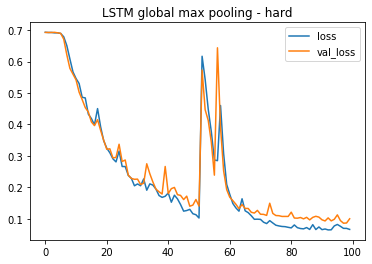

In [28]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("LSTM global max pooling - hard")
plt.legend()
plt.show()

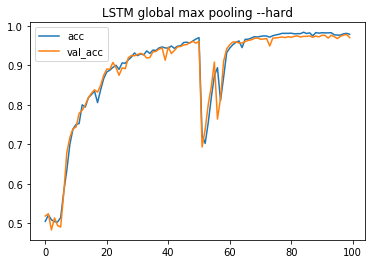

In [29]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.title("LSTM global max pooling --hard")
plt.legend()
plt.show()

We see LSTM doing better with GLobalmaxpooling1D as it allows to remember longer network. 